
# TP Clustering
### Diane LINGRAND 

diane.lingrand@univ-cotedazur.fr 


In [1]:
#import the necessary libraries
import numpy as np
import sys
import matplotlib
import matplotlib.pyplot as plt

# Experiments on synthetic data

## Generating blobs

In [2]:
from sklearn.datasets import make_blobs

In [3]:
n_samples = 1500
random_state = 160
#random_state is the seed for the random generation and let you reproduce the exact same dataset
X, y = make_blobs(centers=3, n_samples=n_samples, random_state=random_state)


### Drawing the data

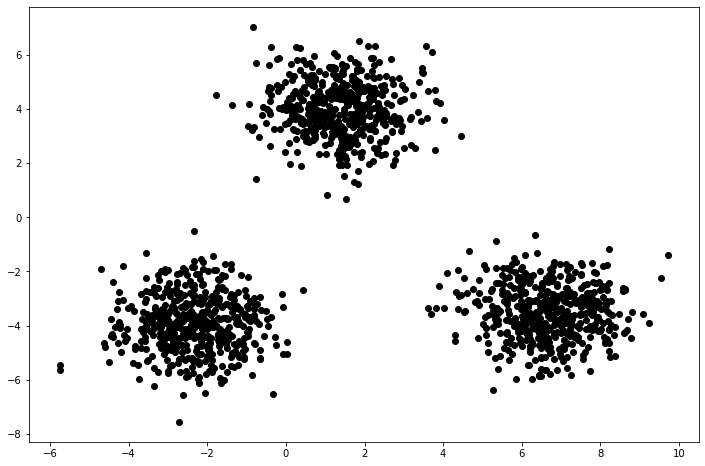

In [4]:
plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1], c='k')
plt.show()

## Clustering method: k-means
Don't hesitate to read the doc: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html !

In [5]:
from sklearn.cluster import KMeans

In [6]:
nbClusters = 3

### Initialisation of the centroids

In [7]:
## basic kmean with random initialisation
km = KMeans(n_clusters=nbClusters, max_iter=10, n_init=1, init='random', algorithm='full')

In [ ]:
## random initialisation but using fixed seed for reproducing the experiments
random_state2 = 150
km = KMeans(n_clusters=nbClusters, max_iter=10, n_init=1, init='random', random_state=random_state2, algorithm='full')

In [10]:
## fixed initialisation of the centroid (no random)
c = np.array([[2,2],[1,5],[2,-4]]) #this is a bad init. try also c=np.array([[5,5],[8,2],[7,2]])
km = KMeans(n_clusters=nbClusters, max_iter=10, n_init=1, init=c, algorithm='full')

In [13]:
## random initialisation using heuristic 'k-means++' 
km = KMeans(n_clusters=nbClusters, max_iter=10, n_init=1, init='k-means++', algorithm='full')
# you could also increase n_init parameter for trying different initialisation of the centroids

### Learning and prediction

In [14]:
#learning and computing the result:
y_pred = km.fit_predict(X)

### Visualisation of the clustering result.

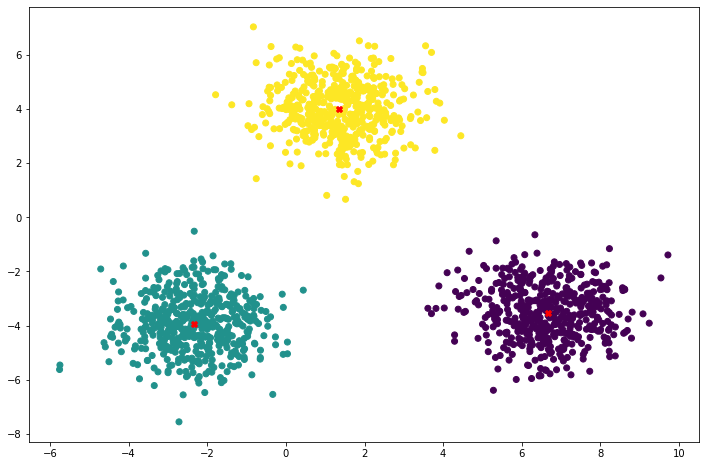

In [17]:
plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
c=km.cluster_centers_
plt.scatter(c[:,0],c[:,1],c='r',marker="X")
plt.show()

## Clustering method: k-medoid
Don't hesitate to read the doc: https://scikit-learn-extra.readthedocs.io/en/latest/generated/sklearn_extra.cluster.KMedoids.html !

In [ ]:
from sklearn_extra.cluster import KMedoids
km1 = KMedoids(n_clusters=nbClusters, max_iter=10, init='random')

Change the init parameters to ‘k-medoids++’ or other parameters and observe the differences.

Don't forget to visualize the results!

## Clustering method: agglomerative clustering
Don't hesitate to read the doc: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
ac = AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='ward')
#play with the linkages
y_pred = ac.fit_predict(X)

## Clustering method: DBSCAN
Don't hesitate to read the doc: https://scikit-learn.org/dev/modules/generated/sklearn.cluster.DBSCAN.html?highlight=dbscan#sklearn.cluster.DBSCAN

In [16]:
from sklearn.cluster import DBSCAN

In [19]:
db = DBSCAN(eps=0.3, min_samples=10)
y_pred=db.fit_predict(X)

#noisy points will be labelled as -1: choose a special color (black ?) for those noisy points
nbClusters = max(y_pred)+1
nbNoise = list(y_pred).count(-1)

print('Number of clusters: ', nbClusters)
print('Number of noisy samples: ', nbNoise)


Number of clusters:  3
Number of noisy samples:  374


## Clustering method: GMM + EM
Don't hesitate to read the doc: https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html?highlight=gaussianmixture

In [15]:
from sklearn.mixture import GaussianMixture

In [16]:
nbGaussians = 3
nbClusters = 3
gm = GaussianMixture(n_components=nbGaussians, covariance_type='spherical', max_iter=50, random_state=0)
y_pred = gm.fit_predict(X)

## Evaluation methods
Don't hesitate to read the doc: https://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation

In [21]:
from sklearn import metrics

In [32]:
print("Calinski Harabasz score: %.2f" %metrics.calinski_harabasz_score(X, y_pred))
print("Davies Bouldin score: %.2f" %metrics.davies_bouldin_score(X, y_pred))
silhouetteScore = metrics.silhouette_score(X, y_pred)
print("Silhouette Coefficient: %.2f" %silhouetteScore)



Calinski Harabasz score: 1161.63
Davies Bouldin score: 1.28
Silhouette Coefficient: 0.43


**Code for plotting silhouettes.** From https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

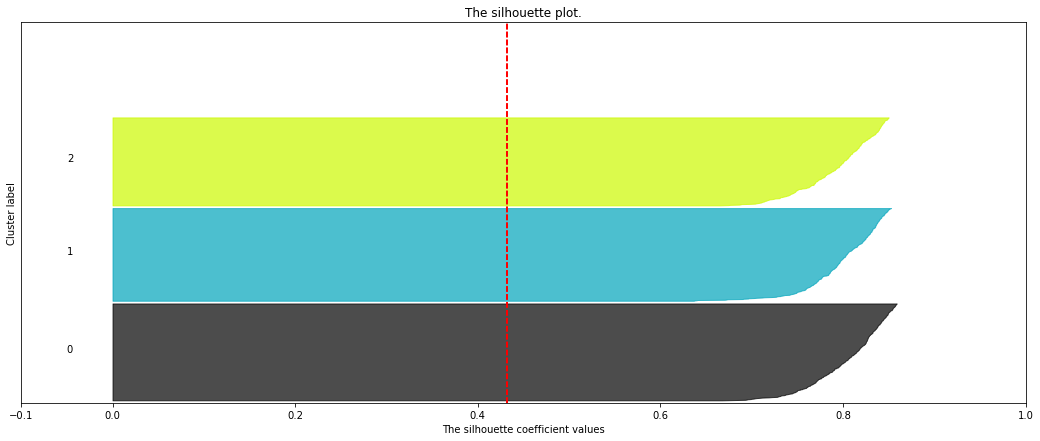

In [41]:
import matplotlib.cm as cm

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
ax.set_xlim([-0.1, 1])
ax.set_ylim([0, len(X) + (nbClusters + 1) * 10])
# Compute the silhouette scores for each sample
sample_silhouette_values = metrics.silhouette_samples(X, y_pred)
y_lower = 10
#loop over clusters
for i in range(nbClusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[y_pred == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / nbClusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title("The silhouette plot.")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouetteScore, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

# Experiments on Iris dataset or MNIST, FMNIST, ...

## Loading the data

In [19]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [ ]:
# in order to plot this data set on your screen, you need to reduce the dimension to 2

### PCA option

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X2 = pca.fit(X).transform(X)

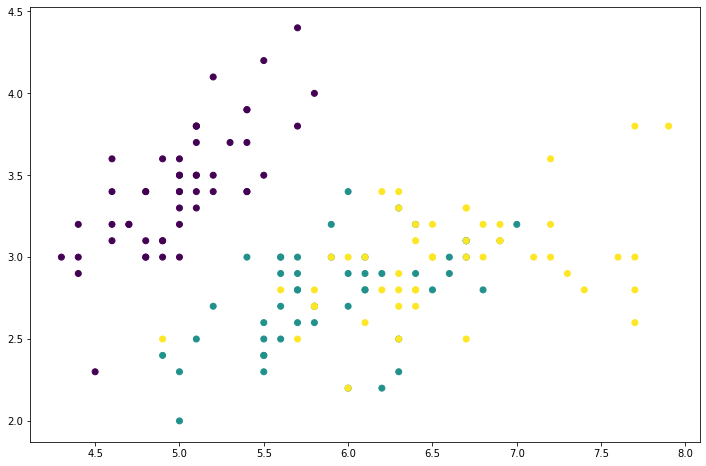

In [21]:
plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

### t-SNE option

## Testing K-means and variants
Remember that you need to find the best configuration: be careful of the configuration of algorithms !

In [ ]:
# your work here